# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Taufik Syah Mauludin
- Email: taufiksyah24@gmail.com
- Id Dicoding: taufiksyahm

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
# Membuat berkas requirement.txt
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Menyiapkan data yang akan digunakan

In [2]:
# Memuat data
df = pd.read_csv("data.csv",delimiter=';')
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


## Data Understanding

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Terdapat beberapa feature yang memiliki tipe data yang tidak sesuai.
(Marital_status, Application_mode, Course, Previous_qualification, Nacionality, Mothers_qualification, Fathers_qualification, Mother_occupation, Father_occupation)

In [13]:
# Mengecek data duplikat
df.duplicated().sum()

0

Tidak ada data duplikat

In [15]:
# Mengecek missing value
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Tidak ada missing value

In [17]:
df["Status"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Status, dtype: int64

Terdapat imbalanced data

### - Data Cleansing

In [19]:
# agar bisa liat table full
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Tidak ada invalid value

In [3]:
# Konversi data numerik menjadi data kategori
# Kolom Marital_status
category_marital = {1:'Single',
                    2:'Married',
                    3:'Widower',
                    4:'Divorced',
                    5:'Facto union',
                    6:'Legally Separated'}

df['Marital_status'] = df['Marital_status'].map(category_marital)

In [4]:
# Konversi data numerik menjadi data kategori
# Kolom Application_mode
category_application = {1:"1st phase - general contingent",
                    2:"Ordinance No. 612/93",
                    5:"1st phase - special contingent (Azores Island)",
                    7:"Holders of other higher courses",
                    10:"Ordinance No. 854-B/99",
                    15:"International student (bachelor)",
                    16:"1st phase - special contingent (Madeira Island)",
                    17:"2nd phase - general contingent",
                    18:"3rd phase - general contingent",
                    26:"Ordinance No. 533-A/99, item b2 (Different Plan)",
                    27:"Ordinance No. 533-A/99, item b3 (Other Institution)",
                    39:"Over 23 years old",
                    42:"Transfer",
                    43:"Change of course",
                    44:"Technological specialization diploma holders",
                    51:"Change of institution/course",
                    53:"Short cycle diploma holders",
                    57:"Change of institution/course (International)"}

df['Application_mode'] = df['Application_mode'].map(category_application)

In [5]:
# Konversi data numerik menjadi data kategori
# Kolom Course
category_course = {33:"Biofuel Production Technologies",
                        171:"Animation and Multimedia Design",
                        8014:"Social Service (evening attendance)",
                        9003:"Agronomy",
                        9070:"Communication Design",
                        9085:"Veterinary Nursing",
                        9119:"Informatics Engineering",
                        9130:"Equinculture",
                        9147:"Management",
                        9238:"Social Service",
                        9254:"Tourism",
                        9500:"Nursing",
                        9556:"Oral Hygiene",
                        9670:"Advertising and Marketing Management",
                        9773:"Journalism and Communication",
                        9853:"Basic Education",
                        9991:"Management (evening attendance)"}

df['Course'] = df['Course'].map(category_course)

In [6]:
# Konversi data numerik menjadi data kategori
# Kolom Previous_qualification
category_previous = {1:"Secondary education",
                        2:"Higher education - bachelor's degree",
                        3:"Higher education - degree",
                        4:"Higher education - master's",
                        5:"Higher education - doctorate",
                        6:"Frequency of higher education",
                        9:"12th year of schooling - not completed",
                        10:"11th year of schooling - not completed",
                        12:"Other - 11th year of schooling",
                        14:"10th year of schooling",
                        15:"10th year of schooling - not completed",
                        19:"Basic education 3rd cycle (9th/10th/11th year) or equiv.",
                        38:"Basic education 2nd cycle (6th/7th/8th year) or equiv.",
                        39:"Technological specialization course",
                        40:"Higher education - degree (1st cycle)",
                        42:"Professional higher technical course",
                        43:"Higher education - master (2nd cycle)"}

df['Previous_qualification'] = df['Previous_qualification'].map(category_previous)

In [7]:
# Konversi data numerik menjadi data kategori
# Kolom Nacionality
category_nacionality = {1:"Portuguese",
                        2:"German",
                        6:"Spanish",
                        11:"Italian",
                        13:"Dutch",
                        14:"English",
                        17:"Lithuanian",
                        21:"Angolan",
                        22:"Cape Verdean",
                        24:"Guinean",
                        25:"Mozambican",
                        26:"Santomean",
                        32:"Turkish",
                        41:"Brazilian",
                        62:"Romanian",
                        100:"Moldova (Republic of)",
                        101:"Mexican",
                        103:"Ukrainian",
                        105:"Russian",
                        108:"Cuban",
                        109:"Colombian"}

df['Nacionality'] = df['Nacionality'].map(category_nacionality)

In [8]:
# Konversi data numerik menjadi data kategori
# Kolom Mothers_qualification
category_mothersq = {1:"Secondary Education - 12th Year of Schooling or Eq.",
                    2:"Higher Education - Bachelor's Degree",
                    3:"Higher Education - Degree",
                    4:"Higher Education - Master's",
                    5:"Higher Education - Doctorate",
                    6:"Frequency of Higher Education",
                    9:"12th Year of Schooling - Not Completed",
                    10:"11th Year of Schooling - Not Completed",
                    11:"7th Year (Old)",
                    12:"Other - 11th Year of Schooling",
                    14:"10th Year of Schooling",
                    18:"General commerce course",
                    19:"Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
                    22:"Technical-professional course",
                    26:"7th year of schooling",
                    27:"2nd cycle of the general high school course",
                    29:"9th Year of Schooling - Not Completed",
                    30:"8th year of schooling",
                    34:"Unknown",
                    35:"Can't read or write",
                    36:"Can read without having a 4th year of schooling",
                    37:"Basic education 1st cycle (4th/5th year) or equiv.",
                    38:"Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
                    39:"Technological specialization course",
                    40:"Higher education - degree (1st cycle)",
                    41:"Specialized higher studies course",
                    42:"Professional higher technical course",
                    43:"Higher Education - Master (2nd cycle)",
                    44:"Higher Education - Doctorate (3rd cycle)"}

df['Mothers_qualification'] = df['Mothers_qualification'].map(category_mothersq)

In [9]:
# Konversi data numerik menjadi data kategori
# Kolom Fathers_qualification
category_fathersq = {1:"Secondary Education - 12th Year of Schooling or Eq.",
                    2:"Higher Education - Bachelor's Degree",
                    3:"Higher Education - Degree",
                    4:"Higher Education - Master's",
                    5:"Higher Education - Doctorate",
                    6:"Frequency of Higher Education",
                    9:"12th Year of Schooling - Not Completed",
                    10:"11th Year of Schooling - Not Completed",
                    11:"7th Year (Old)",
                    12:"Other - 11th Year of Schooling",
                    13:"2nd year complementary high school course",
                    14:"10th Year of Schooling",
                    18:"General commerce course",
                    19:"Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
                    20:"Complementary High School Course",
                    22:"Technical-professional course",
                    25:"Complementary High School Course - not concluded",
                    26:"7th year of schooling",
                    27:"2nd cycle of the general high school course",
                    29:"9th Year of Schooling - Not Completed",
                    30:"8th year of schooling",
                    31:"General Course of Administration and Commerce",
                    33:"Supplementary Accounting and Administration",
                    34:"Unknown",
                    35:"Can't read or write",
                    36:"Can read without having a 4th year of schooling",
                    37:"Basic education 1st cycle (4th/5th year) or equiv.",
                    38:"Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
                    39:"Technological specialization course",
                    40:"Higher education - degree (1st cycle)",
                    41:"Specialized higher studies course",
                    42:"Professional higher technical course",
                    43:"Higher Education - Master (2nd cycle)",
                    44:"Higher Education - Doctorate (3rd cycle)"}

df['Fathers_qualification'] = df['Fathers_qualification'].map(category_fathersq)

In [10]:
# Konversi data numerik menjadi data kategori
# Kolom Mothers_occupation
category_motherso = {0:"Student",
                    1:"Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
                    2:"Specialists in Intellectual and Scientific Activities",
                    3:"Intermediate Level Technicians and Professions",
                    4:"Administrative staff",
                    5:"Personal Services, Security and Safety Workers and Sellers",
                    6:"Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
                    7:"Skilled Workers in Industry, Construction and Craftsmen",
                    8:"Installation and Machine Operators and Assembly Workers",
                    9:"Unskilled Workers",
                    10:"Armed Forces Professions",
                    90:"Other Situation",
                    99:"(blank)",
                    122:"Health professionals",
                    123:"teachers",
                    125:"Specialists in information and communication technologies (ICT)",
                    131:"Intermediate level science and engineering technicians and professions",
                    132:"Technicians and professionals, of intermediate level of health",
                    134:"Intermediate level technicians from legal, social, sports, cultural and similar services",
                    141:"Office workers, secretaries in general and data processing operators",
                    143:"Data, accounting, statistical, financial services and registry-related operators",
                    144:"Other administrative support staff",
                    151:"personal service workers",
                    152:"sellers",
                    153:"Personal care workers and the like",
                    171:"Skilled construction workers and the like, except electricians",
                    173:"Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
                    175:"Workers in food processing, woodworking, clothing and other industries and crafts",
                    191:"cleaning workers",
                    192:"Unskilled workers in agriculture, animal production, fisheries and forestry",
                    193:"Unskilled workers in extractive industry, construction, manufacturing and transport",
                    194:"Meal preparation assistants"}

df['Mothers_occupation'] = df['Mothers_occupation'].map(category_motherso)

In [11]:
# Konversi data numerik menjadi data kategori
# Kolom Fathers_occupation
category_fatherso = {0:"Student",
                    1:"Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
                    2:"Specialists in Intellectual and Scientific Activities",
                    3:"Intermediate Level Technicians and Professions",
                    4:"Administrative staff",
                    5:"Personal Services, Security and Safety Workers and Sellers",
                    6:"Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
                    7:"Skilled Workers in Industry, Construction and Craftsmen",
                    8:"Installation and Machine Operators and Assembly Workers",
                    9:"Unskilled Workers",
                    10:"Armed Forces Professions",
                    90:"Other Situation",
                    99:"(blank)",
                    101:"Armed Forces Officers",
                    102:"Armed Forces Sergeants",
                    103:"Other Armed Forces personnel",
                    112:"Directors of administrative and commercial services",
                    114:"Hotel, catering, trade and other services directors",
                    121:"Specialists in the physical sciences, mathematics, engineering and related techniques",
                    122:"Health professionals",
                    123:"teachers",
                    124:"Specialists in finance, accounting, administrative organization, public and commercial relations",
                    131:"Intermediate level science and engineering technicians and professions",
                    132:"Technicians and professionals, of intermediate level of health",
                    134:"Intermediate level technicians from legal, social, sports, cultural and similar services",
                    135:"Information and communication technology technicians",
                    141:"Office workers, secretaries in general and data processing operators",
                    143:"Data, accounting, statistical, financial services and registry-related operators",
                    144:"Other administrative support staff",
                    151:"personal service workers",
                    152:"sellers",
                    153:"Personal care workers and the like",
                    154:"Protection and security services personnel",
                    161:"Market-oriented farmers and skilled agricultural and animal production workers",
                    163:"Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
                    171:"Skilled construction workers and the like, except electricians",
                    172:"Skilled workers in metallurgy, metalworking and similar",
                    174:"Skilled workers in electricity and electronics",
                    175:"Workers in food processing, woodworking, clothing and other industries and crafts",
                    181:"Fixed plant and machine operators",
                    182:"assembly workers",
                    183:"Vehicle drivers and mobile equipment operators",
                    192:"Unskilled workers in agriculture, animal production, fisheries and forestry",
                    193:"Unskilled workers in extractive industry, construction, manufacturing and transport",
                    194:"Meal preparation assistants",
                    195:"Street vendors (except food) and street service providers"}

df['Fathers_occupation'] = df['Fathers_occupation'].map(category_fatherso)

### - Exploratory Data Analysis

In [12]:
# Kolom data kategori
categorical = df.dtypes==object
categorical_columns = df.columns[categorical].tolist()
categorical_columns

['Marital_status',
 'Application_mode',
 'Course',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Status']

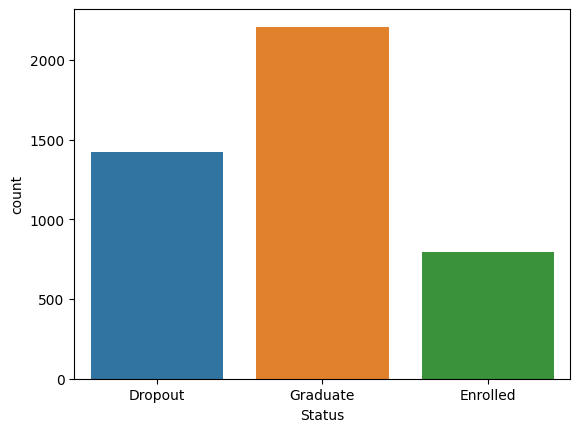

In [34]:
sns.countplot(data=df, x='Status')
plt.show()

Terjadi imbalanced data. Status Enrolled tidak diperlukan.

In [12]:
# Drop baris jika kolom Status berisi Enrolled
df = df[df['Status'] != 'Enrolled']

In [29]:
def categorical_plot(kolom):
    sns.countplot(data=df, x="Status", hue=kolom)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.figure(figsize=(10, 5))
    plt.show()

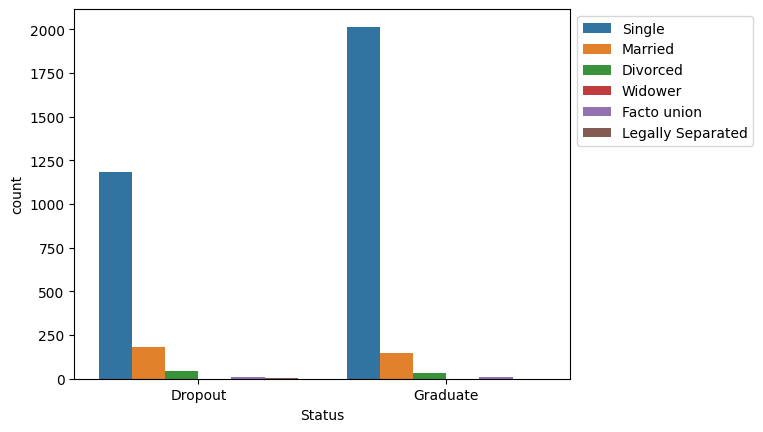

<Figure size 1000x500 with 0 Axes>

In [49]:
categorical_plot('Marital_status')

Siswa dengan Marital_status single lebih banyak Graduate dibandingkan Dropout. Selain itu, jumlah siswa Graduate dan Dropout hampir sama

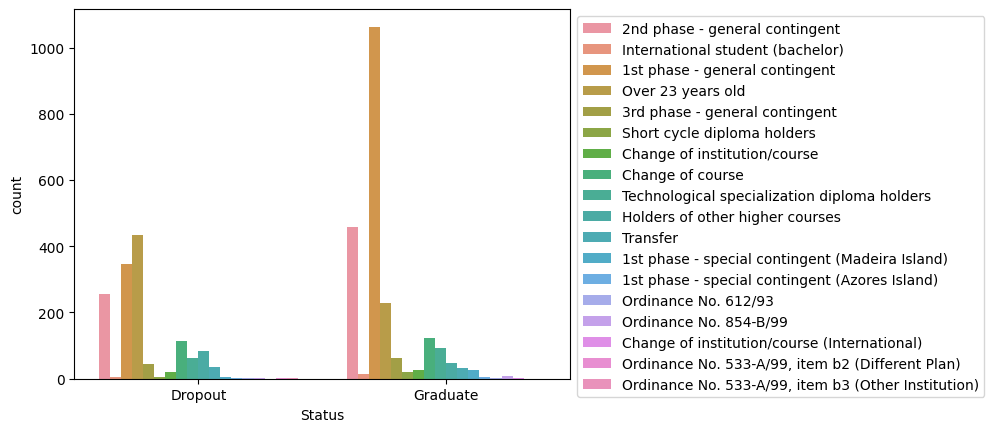

<Figure size 1000x500 with 0 Axes>

In [50]:
categorical_plot('Application_mode')

Siswa dengan Application_mode Over 23 years old lebih banyak Dropout. Sedangkan, siswa dengan Application_mode 2nd phase dan 1st phase lebih banyak Graduate.

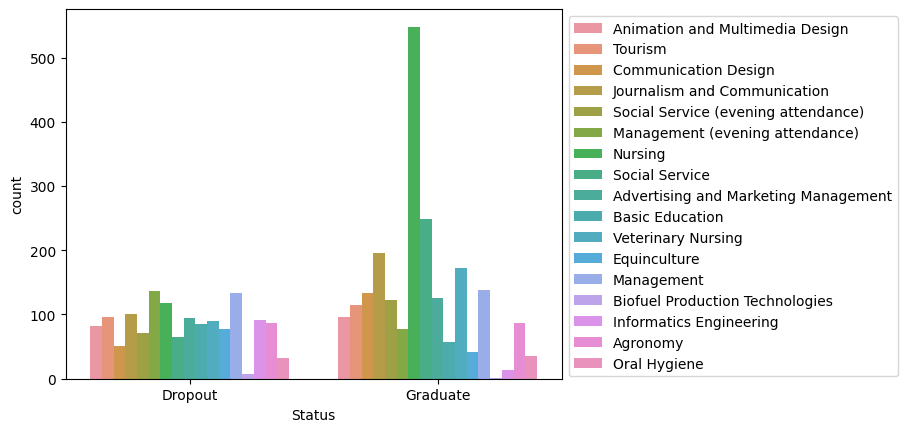

<Figure size 1000x500 with 0 Axes>

In [51]:
categorical_plot('Course')

Siswa dengan Course Management (evening attendance), Advertising and Marketing Management, Basic Education, Equinculture, dan Informatics Engineering lebih banyak mengalami Dropout. Sedangkan, siswa dengan Course Communication Design, Jounalism and Communication, Social Service (evening attendance), Nursing, Social Service, dan Veterinary Nursing lebih banyak Graduate. 

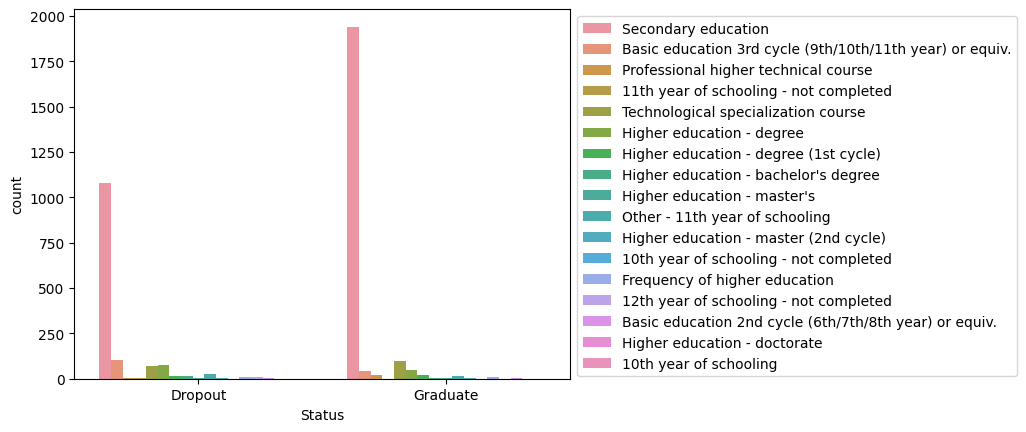

<Figure size 1000x500 with 0 Axes>

In [53]:
categorical_plot("Previous_qualification")

Siswa dengan Previous_qualification Secondary education lebih banyak Graduate

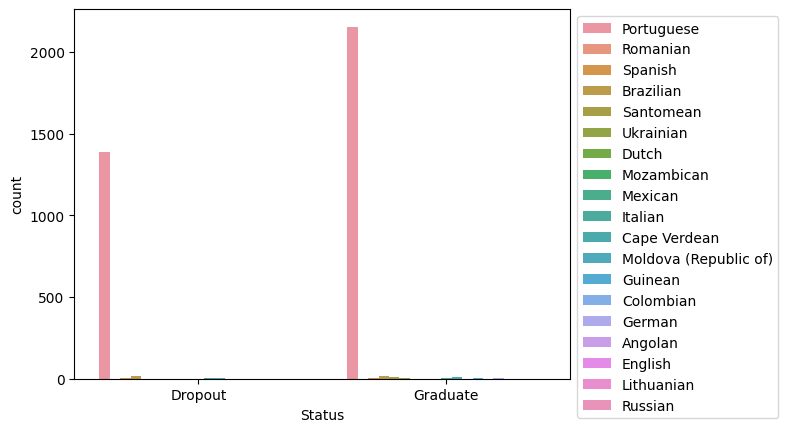

<Figure size 1000x500 with 0 Axes>

In [54]:
categorical_plot("Nacionality")

Siswa dengan Nationality Portuguese lebih banyak Graduate.

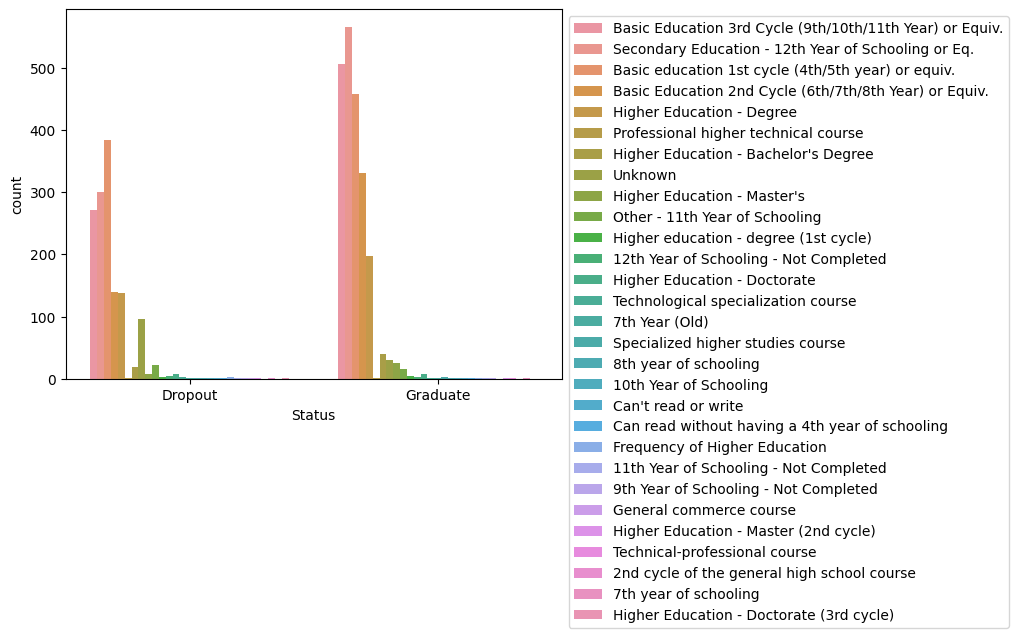

<Figure size 1000x500 with 0 Axes>

In [55]:
categorical_plot("Mothers_qualification")

Siswa dengan Mothers_qualification Unknown lebih banyak dropout. Sedangkan, siswa dengan Mothers_qualification Basic Education 1st-2nd-3rd Cycle dan Secondary Education lebih banyak Graduate.

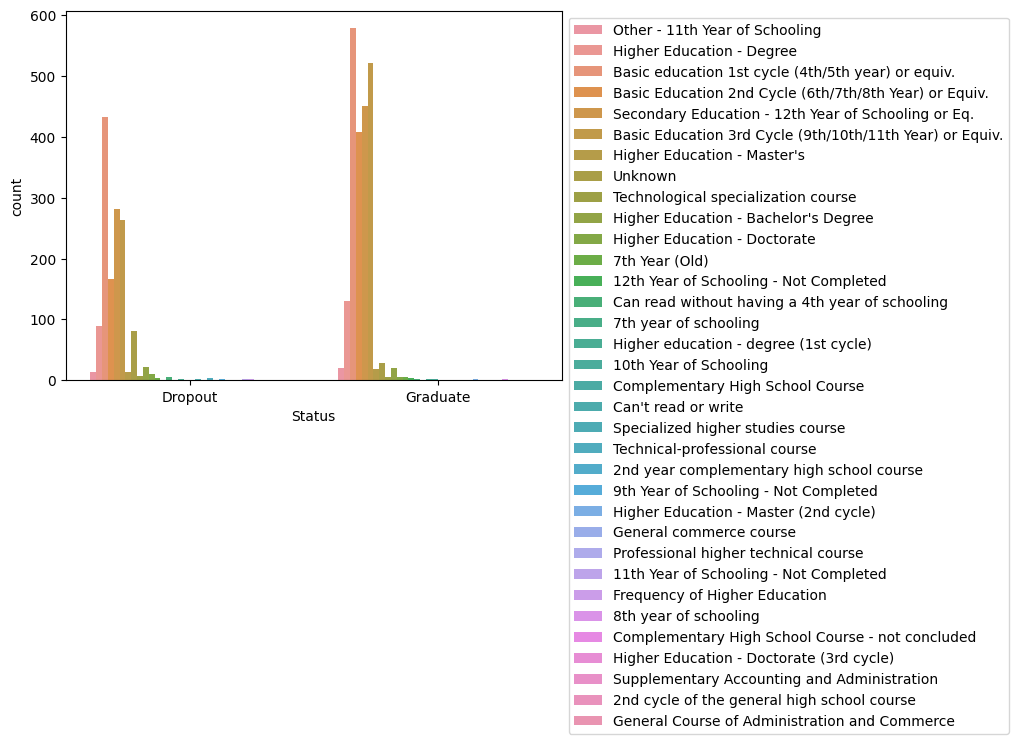

<Figure size 1000x500 with 0 Axes>

In [56]:
categorical_plot("Fathers_qualification")

Siswa dengan Fathers_qualification Unknown lebih banyak dropout. Sedangkan, siswa dengan Fathers_qualification Basic Education 1st-2nd-3rd Cycle dan Secondary Education lebih banyak Graduate.

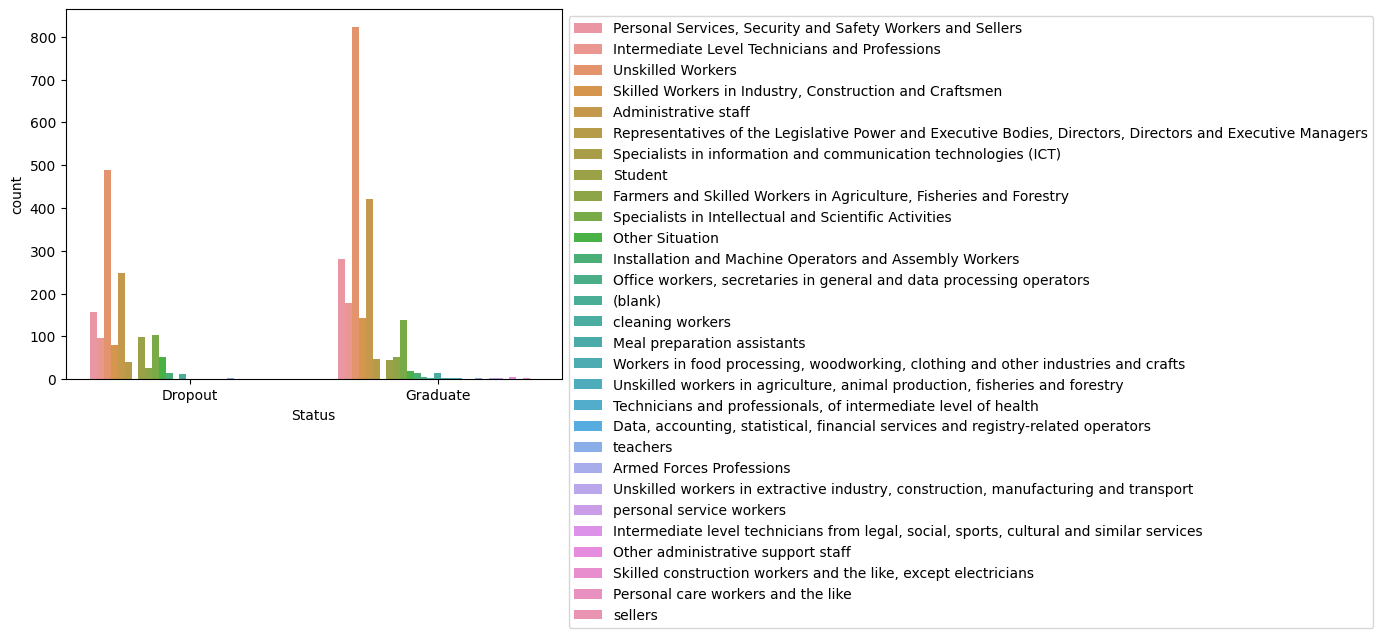

<Figure size 1000x500 with 0 Axes>

In [57]:
categorical_plot("Mothers_occupation")

Siswa dengan Mothers_occupation Student dan Other Situation lebih banyak Dropout. Sedangkan, siswa dengan Mothers_occupation Personal Service, Security and Safety Workers and Sellers; Intermediate Level Technician and Profession; Unskilled workers; dan Administrative Staff lebih banyak Graduate.

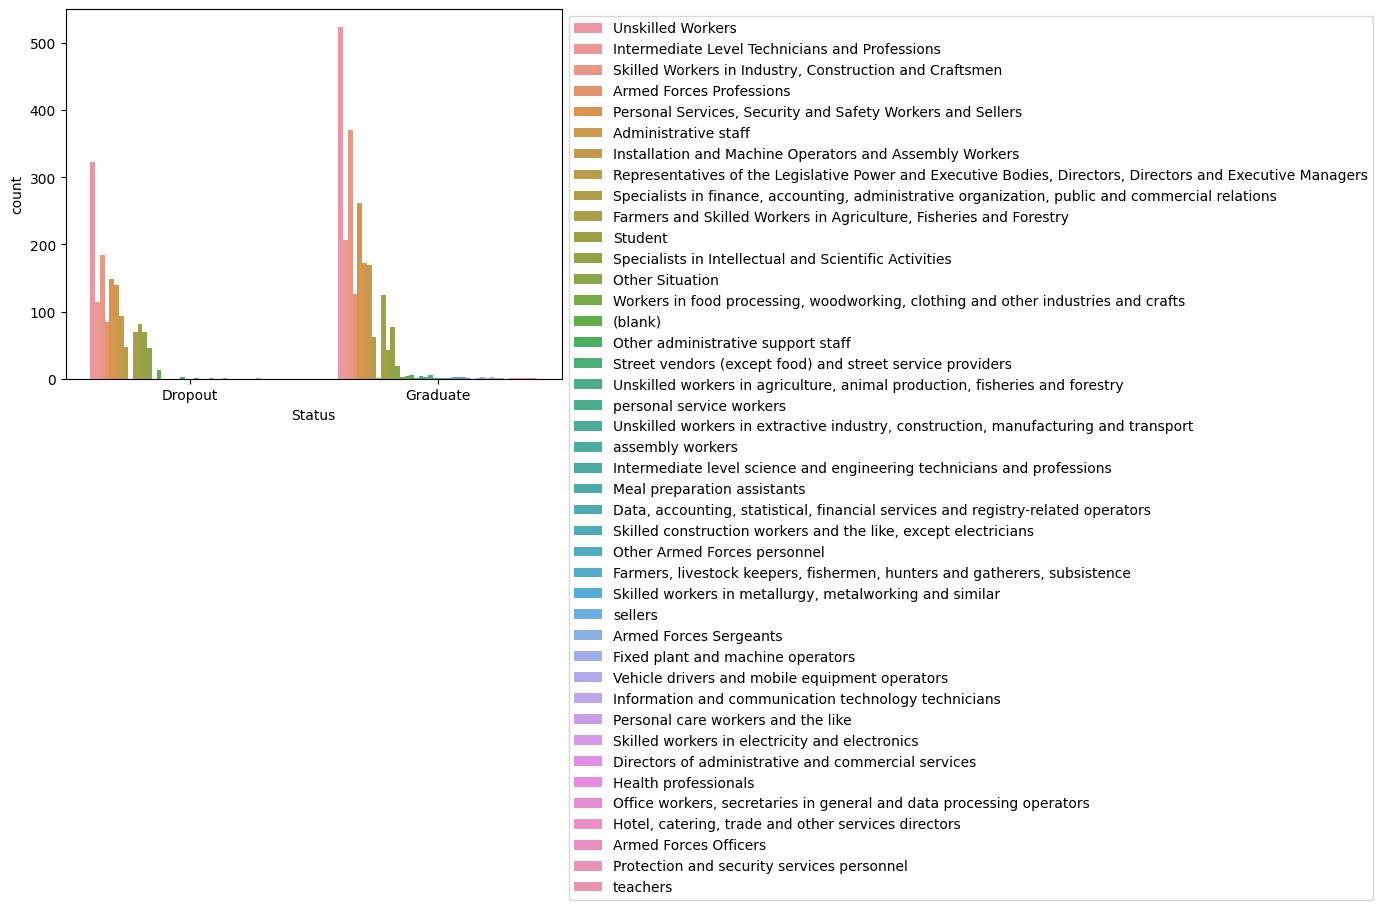

<Figure size 1000x500 with 0 Axes>

In [58]:
categorical_plot("Fathers_occupation")

Siswa dengan Fathers_occupation Student dan Other Situation lebih banyak Dropout. Sedangkan, siswa dengan Fathers_occupation Unskilled Workers; Intermediate Level Technician and Profession; Skilled Workers in Industry, Construction and Craftsmen; Personal Service, Security and Safety Workers and Sellers lebih banyak Graduate.

In [59]:
# Mengubah kolom status dari kategori menjadi numerik
status = {'Graduate':0,
          'Dropout':1}
          
df['Status'] = df['Status'].map(status)

In [14]:
# mengecek data kategori
numerical = df.dtypes!=object
numerical_columns = df.columns[numerical].tolist()
numerical_columns

['Application_order',
 'Daytime_evening_attendance',
 'Previous_qualification_grade',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

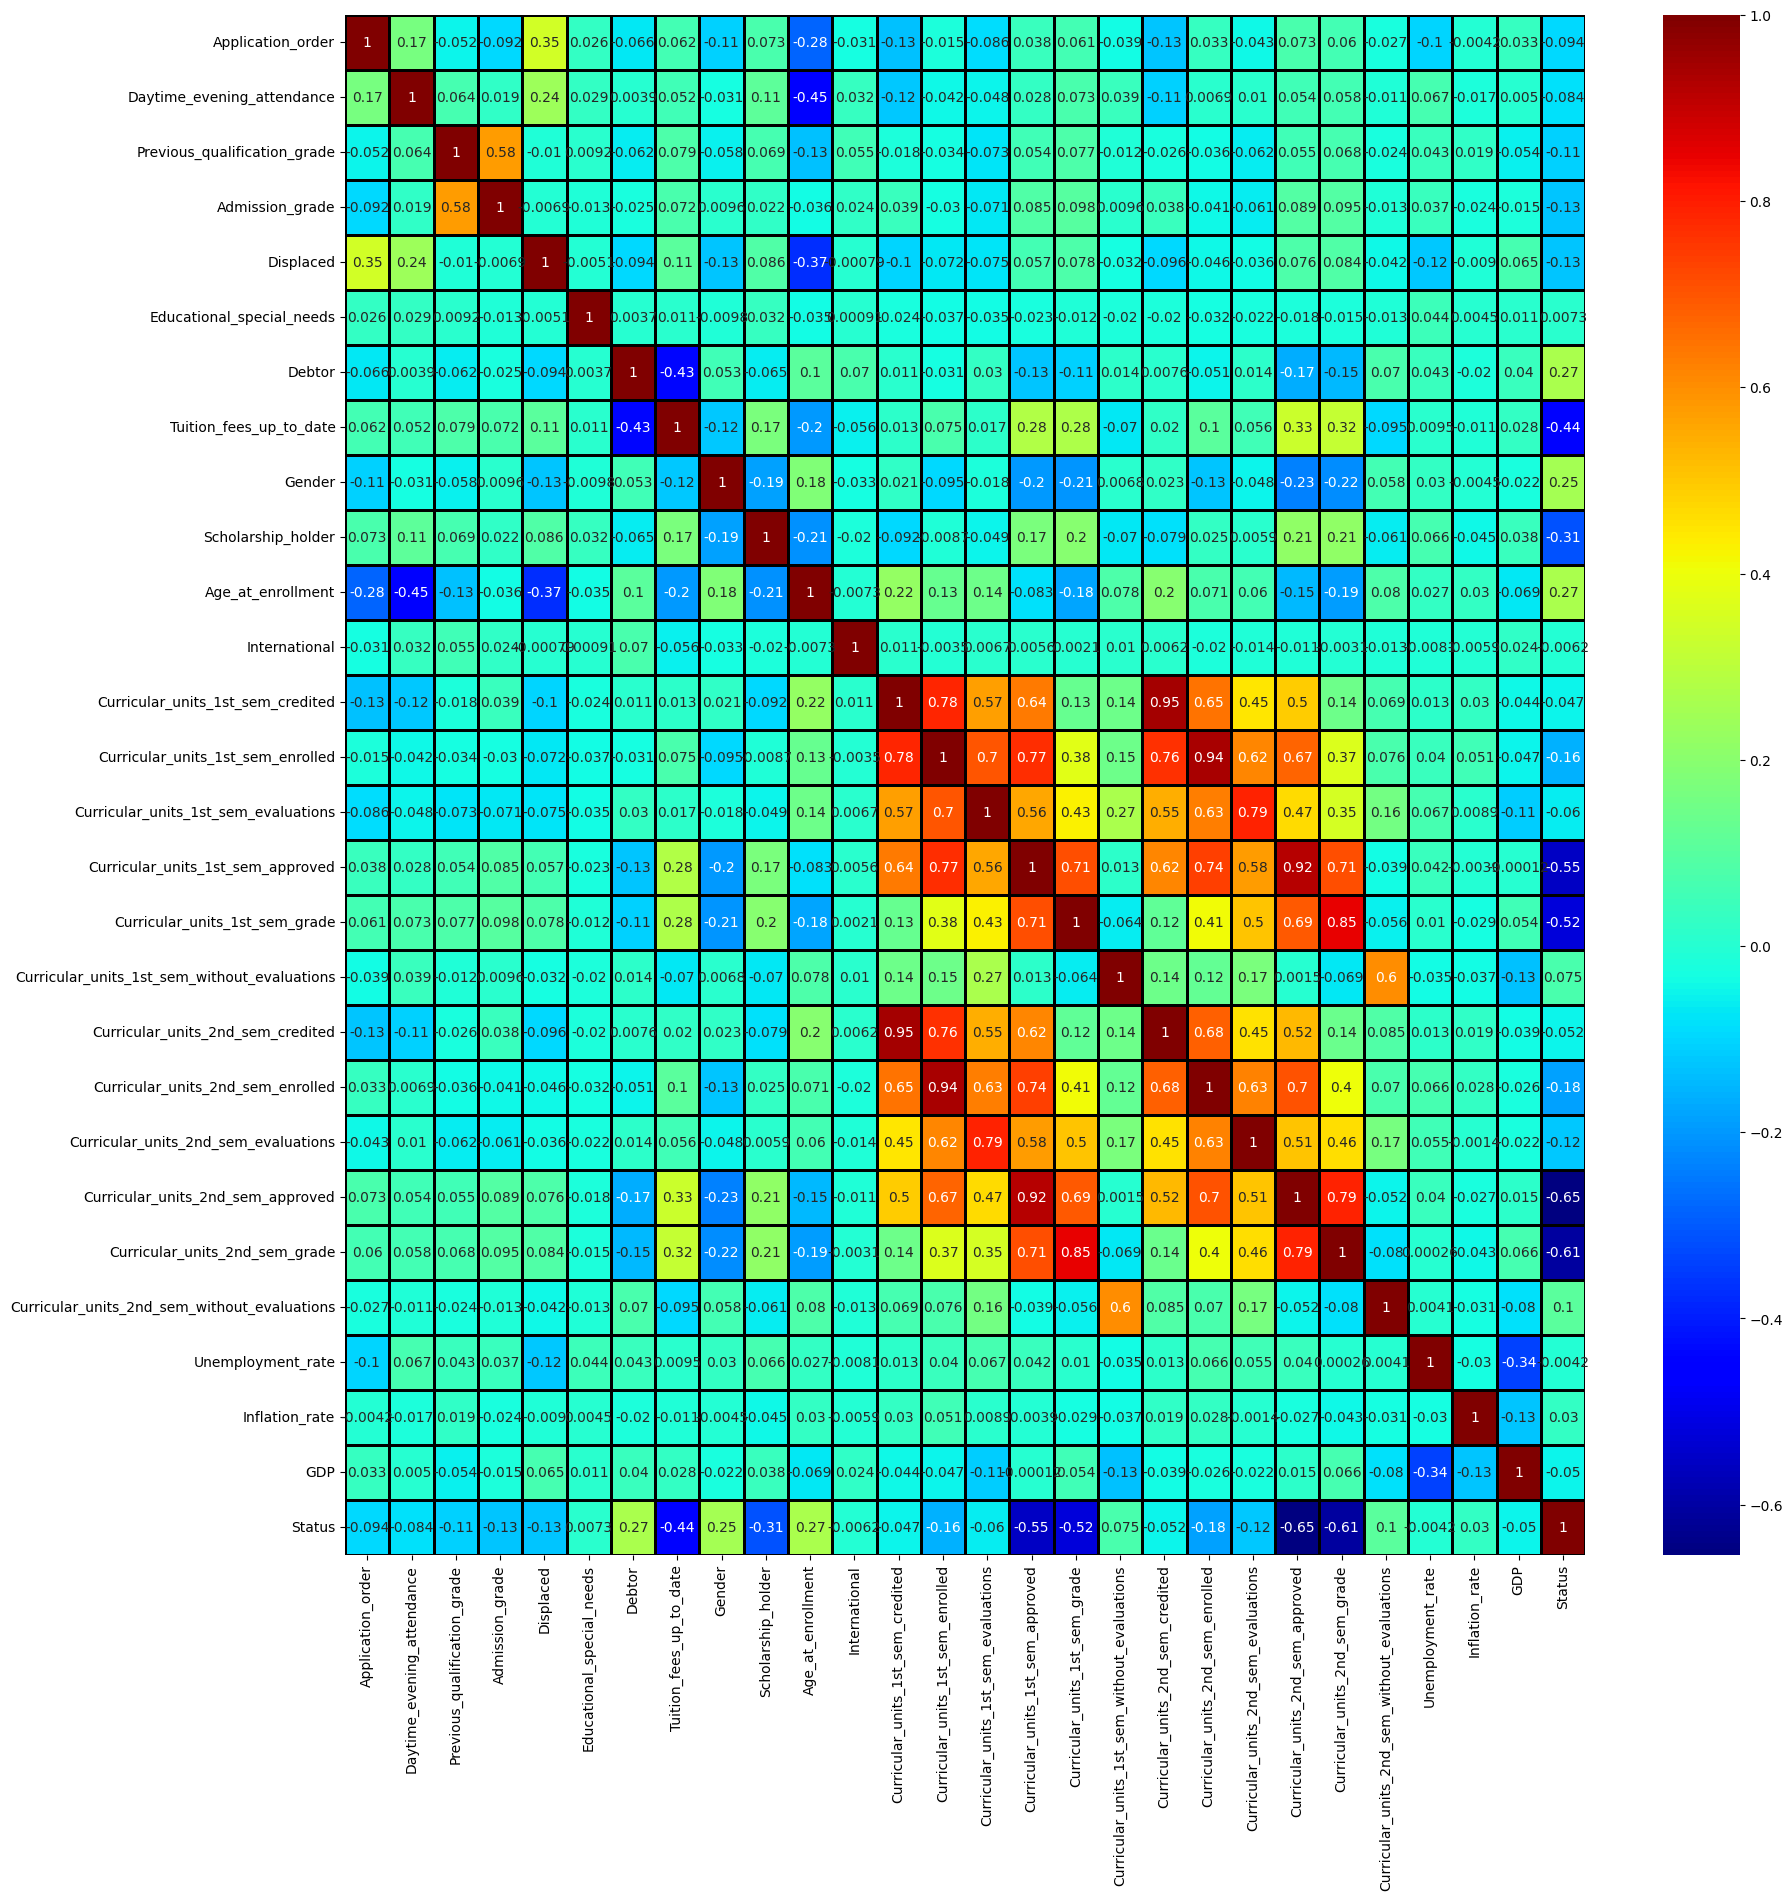

In [70]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

Curricular_units_1st_sem_approved, Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_approved, dan Curricular_units_2nd_sem_grade berkolerasi kuat secara negatif dengan Status

In [15]:
numerical_columns = [
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
    ]

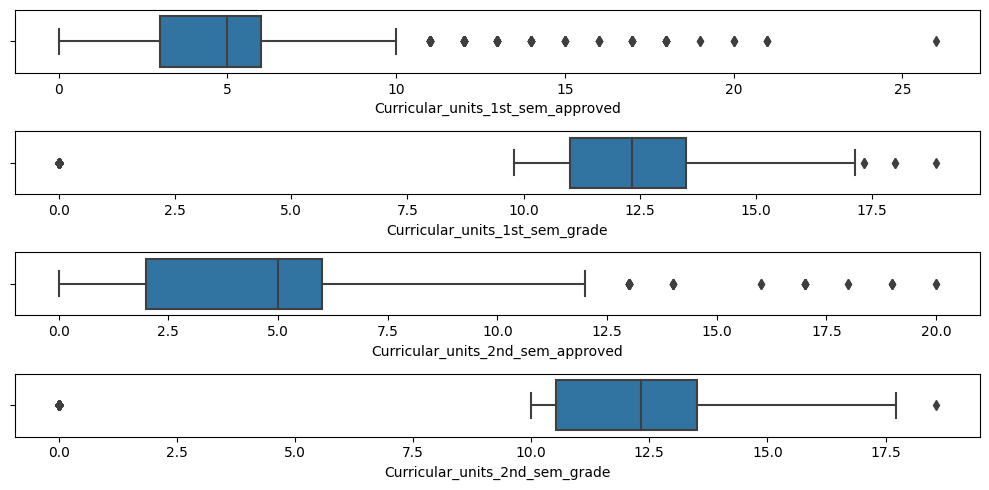

In [72]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,5))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()
     
numerical_dis_plot(
    features=numerical_columns,
    df=df
)

Outlier bukan data yang janggal

In [13]:
# Mengubah kolom status dari numerik menjadi kategori
status = {0:"Graduate",
          1:'Dropout'}
          
df['Status'] = df['Status'].map(status)

### - Train Test Split

In [13]:
# Menghapus kolom yang tidak dibutuhkan
cleaned_df = df.drop(columns=['Application_order',
 'Daytime_evening_attendance',
 'Previous_qualification_grade',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP'], axis=1)
cleaned_df.head()

,Marital_status,Application_mode,Course,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,Single,2nd phase - general contingent,Animation and Multimedia Design,Secondary education,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,0,0.000000,0,0.000000,Dropout
1,Single,International student (bachelor),Tourism,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,6,14.000000,6,13.666667,Graduate
2,Single,1st phase - general contingent,Communication Design,Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,0,0.000000,0,0.000000,Dropout
3,Single,2nd phase - general contingent,Journalism and Communication,Secondary education,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,6,13.428571,5,12.400000,Graduate
4,Married,Over 23 years old,Social Service (evening attendance),Secondary education,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,5,12.333333,6,13.000000,Graduate


In [15]:
# Save CSV
cleaned_df.insert(0, 'No', range(1, 1 + len(cleaned_df)))
cleaned_df.to_csv('cleaned_data.csv', index=False)

In [14]:
categorical_columns = ['Marital_status',
 'Application_mode',
 'Course',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation']

In [15]:
numerical_columns = [
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
    ]

In [16]:
# Membagi data train dan test
train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

(2904, 14)
(726, 14)


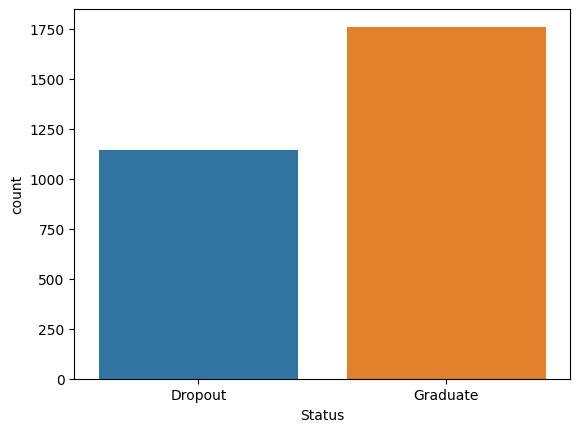

In [18]:
sns.countplot(data=train_df, x="Status")
plt.show()

Data imbalanced akan ditangani dengan teknik undersampling

In [17]:
# Jumlah data
train_df.Status.value_counts()

Graduate    1760
Dropout     1144
Name: Status, dtype: int64

In [18]:
# Pengelompokkan data
df_majority = train_df[(train_df.Status == "Graduate")]
df_minority = train_df[(train_df.Status == "Dropout")]

In [19]:
# Resample
df_majority_undersampled = resample(df_majority, n_samples=1144, random_state=42)
print(df_majority_undersampled.shape)

(1144, 14)


In [20]:
# Menggabungkan dan mengacak data
undersampled_train_df = pd.concat([df_minority, df_majority_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Application_mode,Course,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
843,Single,Over 23 years old,Veterinary Nursing,Basic education 3rd cycle (9th/10th/11th year)...,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,"Skilled Workers in Industry, Construction and ...",3,11.750000,3,10.333333,Dropout
814,Single,Over 23 years old,Agronomy,Secondary education,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Administrative staff,6,11.375000,5,11.600000,Graduate
49,Single,2nd phase - general contingent,Communication Design,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,Armed Forces Professions,6,12.666667,5,11.800000,Dropout
335,Single,2nd phase - general contingent,Journalism and Communication,Secondary education,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Secondary Education - 12th Year of Schooling o...,Administrative staff,Administrative staff,6,13.000000,0,0.000000,Dropout
136,Single,1st phase - general contingent,Tourism,Secondary education,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,"Farmers and Skilled Workers in Agriculture, Fi...",5,11.000000,5,11.400000,Graduate


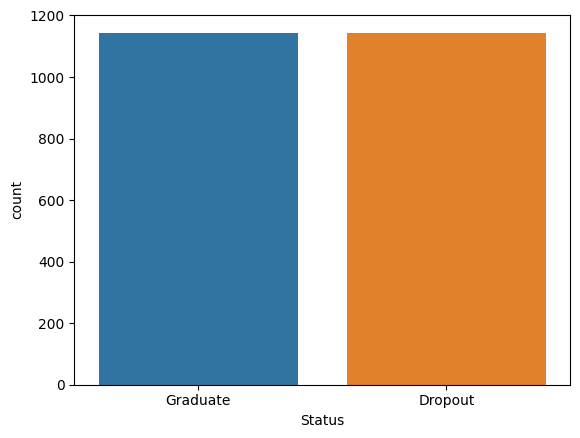

In [23]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

Data sudah balanced

### - Scaling

In [21]:
# Pemisahan feature
X_train = undersampled_train_df.drop(columns="Status", axis=1)
y_train = undersampled_train_df["Status"]
     
X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [22]:
def scaling(features, df, df_test=None):
    if not os.path.exists('model'):
        os.makedirs('model')
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df
 

In [23]:
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

### - Encoding

In [24]:
def encoding(features, df, df_test=None):
    if not os.path.exists('model'):
        os.makedirs('model')
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            unseen_labels = set(df_test[feature]) - set(encoder.classes_)
            for unseen in unseen_labels:
                encoder.classes_ = np.append(encoder.classes_, unseen)
            
            df_test[feature] = df_test[feature].apply(
                lambda x: x if x in encoder.classes_ else 'unknown'
            )
            encoder.classes_ = np.append(encoder.classes_, 'unknown')
            
            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [25]:
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [26]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")
     
new_y_test = encoder.transform(y_test)

## - PCA

In [75]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

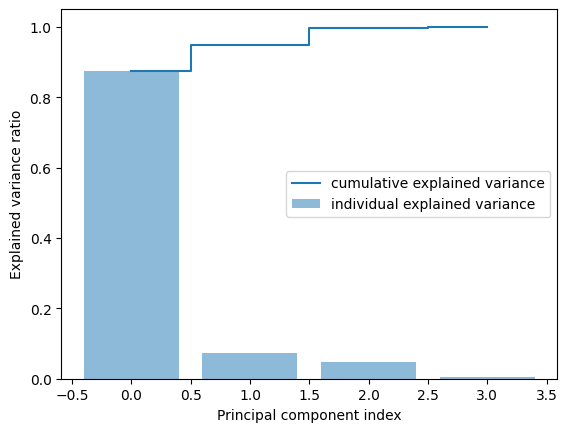

In [76]:
pca = PCA(n_components=len(numerical_columns), random_state=123)
pca.fit(train_pca_df[numerical_columns])
princ_comp = pca.transform(train_pca_df[numerical_columns])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(numerical_columns)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(numerical_columns)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Tidak dilakukan PCA

## Modeling

In [26]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=123)
 
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(new_train_df, new_y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [27]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}


In [30]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini', 
    max_depth=7, 
    max_features='auto'
)
     
tree_model.fit(new_train_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


['model/tree_model.joblib']

In [26]:
# Random Forest
rdf_model = RandomForestClassifier(random_state=123)
 
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}
 
CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(new_train_df, new_y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [27]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [27]:
rdf_model = RandomForestClassifier(
    random_state=123, 
    max_depth=8, 
    n_estimators=200, 
    max_features='auto', 
    criterion='gini', 
    n_jobs=-1
)
rdf_model.fit(new_train_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


['model/rdf_model.joblib']

In [45]:
# Gradient Boosting
     
gboost_model = GradientBoostingClassifier(random_state=123)
     
param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}
     
CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(new_train_df, new_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [46]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.01, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}


In [28]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.01, 
    max_depth=8, 
    max_features='sqrt',
    n_estimators=300
)
gboost_model.fit(new_train_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

In [28]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Graduate', 'Dropout']
    
    print(classification_report(y_pred=y_pred, y_true=y_true))
    
    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    
    return confusion_matrix_df

In [31]:
y_pred_test = tree_model.predict(new_test_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

     Dropout       0.80      0.79      0.79       277
    Graduate       0.87      0.88      0.87       449

    accuracy                           0.84       726
   macro avg       0.83      0.83      0.83       726
weighted avg       0.84      0.84      0.84       726



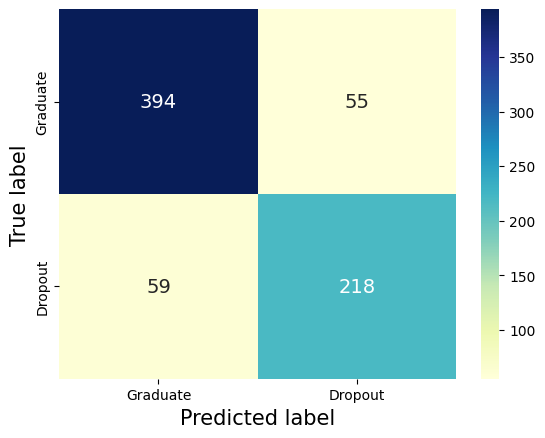

,Graduate,Dropout
Graduate,394,55
Dropout,59,218


In [31]:
# Decision Tree
evaluating(y_pred=y_pred_test, y_true=y_test)

In [32]:
y_pred_test = rdf_model.predict(new_test_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

     Dropout       0.83      0.82      0.82       277
    Graduate       0.89      0.90      0.89       449

    accuracy                           0.87       726
   macro avg       0.86      0.86      0.86       726
weighted avg       0.87      0.87      0.87       726



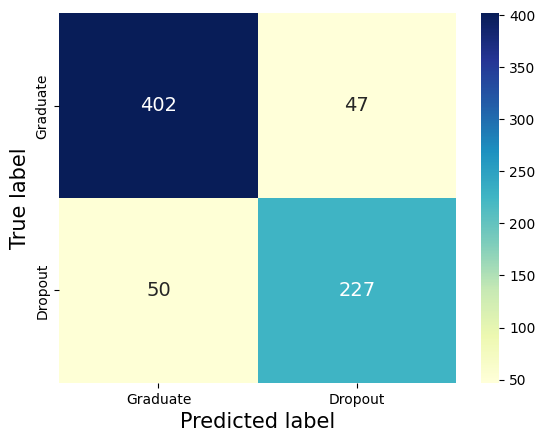

,Graduate,Dropout
Graduate,402,47
Dropout,50,227


In [33]:
# Random Forest
evaluating(y_pred=y_pred_test, y_true=y_test)

In [34]:
y_pred_test = gboost_model.predict(new_test_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

     Dropout       0.80      0.81      0.81       277
    Graduate       0.88      0.88      0.88       449

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726



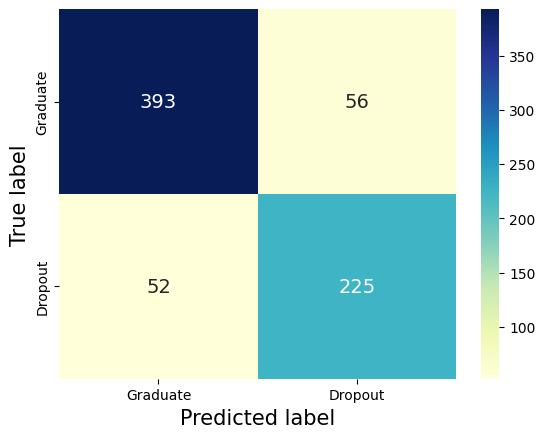

,Graduate,Dropout
Graduate,393,56
Dropout,52,225


In [35]:
# Gradient Boost
evaluating(y_pred=y_pred_test, y_true=y_test)

Berdasarkan metrik accuracy, model yang memiliki performa terbaiknya adalah Random Forest.

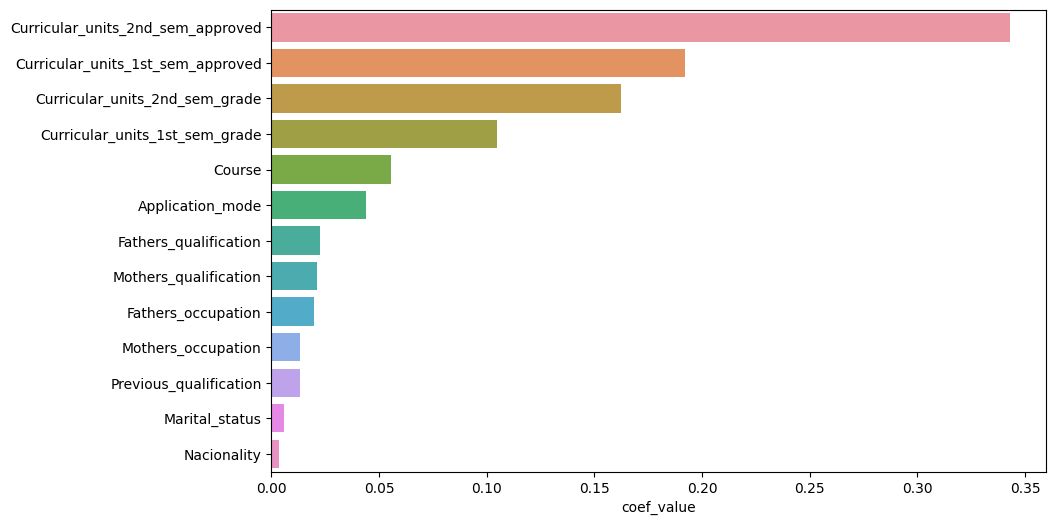

,coef_value
Curricular_units_2nd_sem_approved,0.342828
Curricular_units_1st_sem_approved,0.191882
Curricular_units_2nd_sem_grade,0.162363
Curricular_units_1st_sem_grade,0.104856
Course,0.055499
Application_mode,0.043718
Fathers_qualification,0.022413
Mothers_qualification,0.021277
Fathers_occupation,0.019659
Mothers_occupation,0.013277


In [51]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features
     
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features
     
plot_feature_importances(rdf_model.feature_importances_, new_train_df.columns)

5 faktor terbesar yang mempengaruhi siswa Graduate atau Dropout adalah Curricular unit 1st-2nd sem approved & grade dan Course.

## Deployment

https://graduate-dropout-or3zbq8kjc7sb5na8xqpws.streamlit.app/